In [1]:
import json
import numpy as np
from os.path import join
import pdb

from diffuser.guides.policies import Policy
import diffuser.datasets as datasets
import diffuser.utils as utils

pybullet build time: May 20 2022 19:44:17


In [75]:
%precision 3
np.set_printoptions(suppress=True)
from matplotlib import pyplot as plt

In [54]:
render_config = utils.load_config(args.logbase, args.dataset, args.diffusion_loadpath, 'render_config.pkl')

[ utils/serialization ] Loaded config from logs/maze2d-large-v1/diffusion/H384_T256/render_config.pkl

[utils/config ] Config: <class 'diffuser.utils.rendering.Maze2dRenderer'>
    env: maze2d-large-v1



In [84]:
args.horizon

384

In [82]:
args.loader

'datasets.GoalDataset'

In [85]:
ds = env.get_dataset()

In [92]:
ds.keys()

dict_keys(['actions', 'infos/goal', 'infos/qpos', 'infos/qvel', 'observations', 'rewards', 'terminals', 'timeouts'])

In [97]:
ds['rewards'].shape

(4000000,)

In [3]:
class Parser(utils.Parser):
    dataset: str = 'maze2d-large-v1'
    config: str = 'config.maze2d'

#---------------------------------- setup ----------------------------------#

args = Parser().parse_args('plan')

# logger = utils.Logger(args)

env = datasets.load_environment(args.dataset)

#---------------------------------- loading ----------------------------------#

diffusion_experiment = utils.load_diffusion(args.logbase, args.dataset, args.diffusion_loadpath, epoch=args.diffusion_epoch)

diffusion = diffusion_experiment.ema
dataset = diffusion_experiment.dataset
renderer = diffusion_experiment.renderer

policy = Policy(diffusion, dataset.normalizer)

[ utils/setup ] Reading config: config.maze2d:maze2d_large_v1
[ utils/setup ] Using overrides | config: config.maze2d | dataset: maze2d_large_v1
[ utils/setup ] Found extras: ['-f', '/home/felixw/.local/share/jupyter/runtime/kernel-a9bba8fd-9faa-40c5-88ae-26fce49a00b5.json']
[ utils/setup ] Lazy fstring | diffusion_loadpath : f:diffusion/H{horizon}_T{n_diffusion_steps} --> diffusion/H128_T16
[ utils/setup ] Setting exp_name to: plans/release_H128_T16_LimitsNormalizer_b1_condFalse
[ utils/setup ] Made savepath: logs/maze2d-large-v1/plans/release_H128_T16_LimitsNormalizer_b1_condFalse/0
[ utils/setup ] Saved args to logs/maze2d-large-v1/plans/release_H128_T16_LimitsNormalizer_b1_condFalse/0/args.json
[ utils/serialization ] Loaded config from logs/maze2d-large-v1/diffusion/H128_T16/dataset_config.pkl

[utils/config ] Config: <class 'diffuser.datasets.sequence.GoalDataset'>
    env: maze2d-large-v1
    horizon: 128
    max_path_length: 40000
    normalizer: LimitsNormalizer
    preprocess

In [49]:
# target = env._target
# target = [3, 10]
env.reset_to_location([1, 7,])
observation = env.state_vector().copy()
cond = {
#     diffusion.horizon - 1: np.array([*target, 0, 0]),
}
for i in range(1):
    cond[i] = np.array([1, 7+0.1*i, 0, 0])
rollout = [observation.copy()]    

{0: array([1., 7., 0., 0.])}

In [68]:
action, samples = policy(cond, batch_size=10)


                                                                                                    
1 / 16 [###                                                         ]   6% | 107.7 Hz
t : 15
                                                                                                    
                                                                                                    
2 / 16 [#######                                                     ]  12% | 132.0 Hz
t : 14
                                                                                                    
                                                                                                    
3 / 16 [###########                                                 ]  18% | 143.3 Hz
t : 13
                                                                                                    
                                                                                                    
4 / 16 [#####

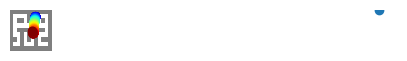

In [78]:
for i in range(10):
#     plt.figure()
    renderer.renders(samples.observations[0, :]);

In [80]:
samples.observations.shape

(10, 128, 4)

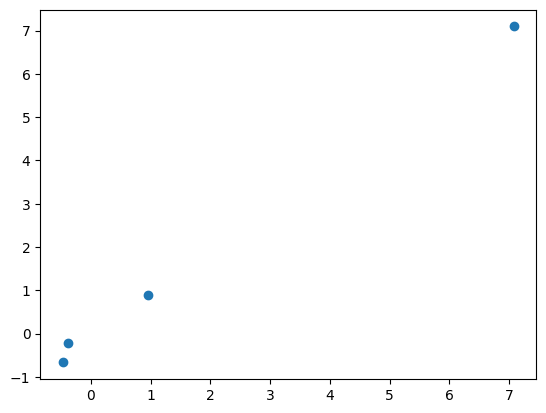

In [51]:
from matplotlib import pyplot as plt
plt.scatter(samples.observations[:,2], samples.observations[:,3])

In [53]:
samples.observations[:, ::10]

array([[[ 1.   ,  7.   ,  0.   ,  0.   ],
        [ 0.952,  6.868, -0.144, -1.974],
        [ 0.928,  6.647,  0.161, -3.769],
        [ 0.971,  6.206,  0.112, -5.06 ],
        [ 0.901,  5.699, -0.032, -3.257],
        [ 1.003,  5.503,  2.006, -1.105],
        [ 1.281,  5.413,  3.779,  0.951],
        [ 1.64 ,  5.516,  3.338,  1.577],
        [ 1.813,  5.429,  2.655, -0.08 ],
        [ 2.146,  5.254,  4.089, -0.74 ],
        [ 2.47 ,  5.083,  2.595, -0.638],
        [ 2.727,  4.911,  4.091, -0.247],
        [ 3.044,  4.669,  3.713, -0.502],
        [ 3.257,  4.545,  1.703,  0.316],
        [ 3.253,  4.549, -0.412,  2.482],
        [ 3.116,  4.81 , -1.266,  4.005],
        [ 3.049,  5.078, -0.452,  2.459],
        [ 2.947,  5.386, -0.913,  4.387],
        [ 2.881,  5.824, -0.002,  3.433],
        [ 2.909,  6.008,  1.05 ,  1.62 ],
        [ 3.148,  6.045,  3.032, -0.075],
        [ 3.542,  6.083,  4.266,  0.127],
        [ 3.909,  6.053,  2.392, -0.449],
        [ 4.26 ,  6.02 ,  4.324, -


                                                                                                    
1 / 256 [                                                            ]   0% | 113.2 Hz
t : 255
                                                                                                    
                                                                                                    
2 / 256 [                                                            ]   0% | 130.9 Hz
t : 254
                                                                                                    
                                                                                                    
3 / 256 [                                                            ]   1% | 139.4 Hz
t : 253
                                                                                                    
                                                                                                    
4 / 256

                                                                                                    
                                                                                                    
33 / 256 [#######                                                     ]  12% | 161.1 Hz
t : 223
                                                                                                    
                                                                                                    
34 / 256 [#######                                                     ]  13% | 161.1 Hz
t : 222
                                                                                                    
                                                                                                    
35 / 256 [########                                                    ]  13% | 161.2 Hz
t : 221
                                                                                                    
     

                                                                                                    
                                                                                                    
65 / 256 [###############                                             ]  25% | 158.7 Hz
t : 191
                                                                                                    
                                                                                                    
66 / 256 [###############                                             ]  25% | 158.5 Hz
t : 190
                                                                                                    
                                                                                                    
67 / 256 [###############                                             ]  26% | 158.4 Hz
t : 189
                                                                                                    
     

                                                                                                    
                                                                                                    
97 / 256 [######################                                      ]  37% | 158.0 Hz
t : 159
                                                                                                    
                                                                                                    
98 / 256 [######################                                      ]  38% | 158.0 Hz
t : 158
                                                                                                    
                                                                                                    
99 / 256 [#######################                                     ]  38% | 158.1 Hz
t : 157
                                                                                                    
     

                                                                                                    
                                                                                                    
131 / 256 [##############################                              ]  51% | 165.5 Hz
t : 125
                                                                                                    
                                                                                                    
132 / 256 [##############################                              ]  51% | 165.5 Hz
t : 124
                                                                                                    
                                                                                                    
133 / 256 [###############################                             ]  51% | 165.5 Hz
t : 123
                                                                                                    
  

                                                                                                    
                                                                                                    
165 / 256 [######################################                      ]  64% | 165.4 Hz
t : 91
                                                                                                    
                                                                                                    
166 / 256 [######################################                      ]  64% | 165.4 Hz
t : 90
                                                                                                    
                                                                                                    
167 / 256 [#######################################                     ]  65% | 165.3 Hz
t : 89
                                                                                                    
     

                                                                                                    
                                                                                                    
199 / 256 [##############################################              ]  77% | 165.4 Hz
t : 57
                                                                                                    
                                                                                                    
200 / 256 [##############################################              ]  78% | 0.0 Hz
t : 56
                                                                                                    
                                                                                                    
201 / 256 [###############################################             ]  78% | 165.4 Hz
t : 55
                                                                                                    
       

                                                                                                    
                                                                                                    
233 / 256 [######################################################      ]  91% | 165.3 Hz
t : 23
                                                                                                    
                                                                                                    
234 / 256 [######################################################      ]  91% | 165.2 Hz
t : 22
                                                                                                    
                                                                                                    
235 / 256 [#######################################################     ]  91% | 165.2 Hz
t : 21
                                                                                                    
     

Saved 1 samples to: logs/maze2d-large-v1/plans/release_H384_T256_LimitsNormalizer_b1_condFalse/0/rollout.png
t: 61 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 0.10400408 -0.15960639]
maze | pos: [1.63936585 7.764431  ] | goal: (7, 9)
t: 62 | r: 0.00 |  R: 0.00 | score: -0.0251 | [-0.14435403 -0.03125445]
maze | pos: [1.6840186  7.78429633] | goal: (7, 9)
t: 63 | r: 0.00 |  R: 0.00 | score: -0.0251 | [-0.15938314 -0.13679953]
maze | pos: [1.72818541 7.80378854] | goal: (7, 9)
t: 64 | r: 0.00 |  R: 0.00 | score: -0.0251 | [-0.32185423 -0.05786696]
maze | pos: [1.7714805  7.82309651] | goal: (7, 9)
t: 65 | r: 0.00 |  R: 0.00 | score: -0.0251 | [-0.51367968 -0.36414304]
maze | pos: [1.81344907 7.84149124] | goal: (7, 9)
t: 66 | r: 0.00 |  R: 0.00 | score: -0.0251 | [-0.62151623 -0.29057702]
maze | pos: [1.85383746 7.85915011] | goal: (7, 9)
t: 67 | r: 0.00 |  R: 0.00 | score: -0.0251 | [-0.6331249  -0.52389083]
maze | pos: [1.89262178 7.8755192 ] | goal: (7, 9)
t: 68 | r: 0.00 |  R: 0.00 | s

Saved 1 samples to: logs/maze2d-large-v1/plans/release_H384_T256_LimitsNormalizer_b1_condFalse/0/rollout.png
t: 161 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 2.30923758 -4.96922018]
maze | pos: [3.19850142 7.40127668] | goal: (7, 9)
t: 162 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 2.34509365 -5.00937361]
maze | pos: [3.19850169 7.4013633 ] | goal: (7, 9)
t: 163 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 2.48010494 -5.31717232]
maze | pos: [3.19850184 7.4014181 ] | goal: (7, 9)
t: 164 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 2.37030883 -5.07114948]
maze | pos: [3.19850193 7.40145144] | goal: (7, 9)
t: 165 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 2.4313881  -4.93043749]
maze | pos: [3.19850197 7.40147117] | goal: (7, 9)
t: 166 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 2.41952375 -4.73856669]
maze | pos: [3.198502   7.40148264] | goal: (7, 9)
t: 167 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 2.43828363 -4.61773177]
maze | pos: [3.19850202 7.40148924] | goal: (7, 9)
t: 168 | r: 0.00 |  R: 

Saved 1 samples to: logs/maze2d-large-v1/plans/release_H384_T256_LimitsNormalizer_b1_condFalse/0/rollout.png
t: 261 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 5.36355402 -0.52596907]
maze | pos: [3.19850204 8.76226561] | goal: (7, 9)
t: 262 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 5.60065701 -0.32028648]
maze | pos: [3.19850204 8.74884462] | goal: (7, 9)
t: 263 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 5.81828358 -0.29723685]
maze | pos: [3.19850204 8.73474768] | goal: (7, 9)
t: 264 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 6.06897452 -0.17492587]
maze | pos: [3.19850204 8.72026771] | goal: (7, 9)
t: 265 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 6.12205127 -0.24003548]
maze | pos: [3.19850204 8.70525055] | goal: (7, 9)
t: 266 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 6.14449504 -0.14307611]
maze | pos: [3.19850204 8.6899284 ] | goal: (7, 9)
t: 267 | r: 0.00 |  R: 0.00 | score: -0.0251 | [5.89028552 0.15891246]
maze | pos: [3.19850204 8.67502121] | goal: (7, 9)
t: 268 | r: 0.00 |  R: 0.

Saved 1 samples to: logs/maze2d-large-v1/plans/release_H384_T256_LimitsNormalizer_b1_condFalse/0/rollout.png
t: 361 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 3.46902898 -0.70720782]
maze | pos: [3.19850204 8.93923014] | goal: (7, 9)
t: 362 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 3.32366517 -0.36542412]
maze | pos: [3.19850204 8.97403616] | goal: (7, 9)
t: 363 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 3.48128512 -0.53590248]
maze | pos: [3.19850204 9.00748296] | goal: (7, 9)
t: 364 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 3.75481799 -0.5068944 ]
maze | pos: [3.19850204 9.03964286] | goal: (7, 9)
t: 365 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 3.79108432 -0.63680977]
maze | pos: [3.19850204 9.07020951] | goal: (7, 9)
t: 366 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 3.9330993  -0.71005742]
maze | pos: [3.19850204 9.09901227] | goal: (7, 9)
t: 367 | r: 0.00 |  R: 0.00 | score: -0.0251 | [ 3.90451577 -0.80860173]
maze | pos: [3.19850204 9.12582063] | goal: (7, 9)
t: 368 | r: 0.00 |  R: 

Saved 1 samples to: logs/maze2d-large-v1/plans/release_H384_T256_LimitsNormalizer_b1_condFalse/0/rollout.png
t: 451 | r: 0.00 |  R: 0.00 | score: -0.0251 | [3.80149796 0.00529639]
maze | pos: [3.19850204 9.15373094] | goal: (7, 9)
t: 452 | r: 0.00 |  R: 0.00 | score: -0.0251 | [3.80149796 0.00524218]
maze | pos: [3.19850204 9.15215748] | goal: (7, 9)
t: 453 | r: 0.00 |  R: 0.00 | score: -0.0251 | [3.80149796 0.00518852]
maze | pos: [3.19850204 9.15060012] | goal: (7, 9)
t: 454 | r: 0.00 |  R: 0.00 | score: -0.0251 | [3.80149796 0.00513542]
maze | pos: [3.19850204 9.1490587 ] | goal: (7, 9)
t: 455 | r: 0.00 |  R: 0.00 | score: -0.0251 | [3.80149796 0.00508286]
maze | pos: [3.19850204 9.14753307] | goal: (7, 9)
t: 456 | r: 0.00 |  R: 0.00 | score: -0.0251 | [3.80149796 0.00503083]
maze | pos: [3.19850204 9.14602304] | goal: (7, 9)
t: 457 | r: 0.00 |  R: 0.00 | score: -0.0251 | [3.80149796 0.00497934]
maze | pos: [3.19850204 9.14452847] | goal: (7, 9)
t: 458 | r: 0.00 |  R: 0.00 | score: 

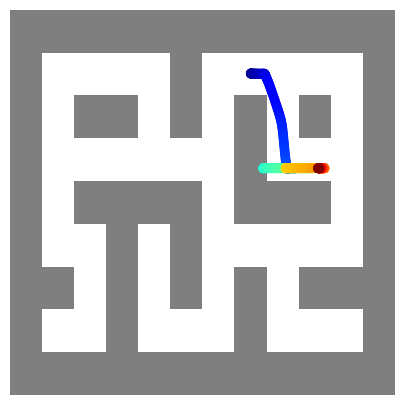

In [8]:
total_reward = 0
for t in range(500):

    state = env.state_vector().copy()

    ## can replan if desired, but the open-loop plans are good enough for maze2d
    ## that we really only need to plan once
    if t == 0:
        cond[0] = observation

        action, samples = policy(cond, batch_size=args.batch_size);
        actions = samples.actions[0]
        sequence = samples.observations[0]
#     pdb.set_trace()

    # ####
    if t < len(sequence) - 1:
        next_waypoint = sequence[t+1]
    else:
        next_waypoint = sequence[-1].copy()
        next_waypoint[2:] = 0
        # pdb.set_trace()

    ## can use actions or define a simple controller based on state predictions
    action = next_waypoint[:2] - state[:2] + (next_waypoint[2:] - state[2:])
    # pdb.set_trace()

    next_observation, reward, terminal, _ = env.step(action)
    total_reward += reward
    score = env.get_normalized_score(total_reward)
    print(
        f't: {t} | r: {reward:.2f} |  R: {total_reward:.2f} | score: {score:.4f} | '
        f'{action}'
    )

    if 'maze2d' in args.dataset:
        xy = next_observation[:2]
        goal = env.unwrapped._target
        print(
            f'maze | pos: {xy} | goal: {goal}'
        )

    ## update rollout observations
    rollout.append(next_observation.copy())

    if t % args.vis_freq == 0 or terminal:
        fullpath = join(args.savepath, f'{t}.png')

        if t == 0: renderer.composite(fullpath, samples.observations, ncol=1)

        ## save rollout thus far
        renderer.composite(join(args.savepath, 'rollout.png'), np.array(rollout)[None], ncol=1)

    if terminal:
        break

    observation = next_observation

In [ ]:
samples.observations.shape

In [ ]:
args.horizon = 128

In [ ]:
renderer.renders(samples.observations);


In [ ]:
observation.shape